In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Admission_predict.csv')

In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.shape

(400, 9)

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold= 0.75)
df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])

In [22]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [33]:
x = df.drop('Chance of Admit ',axis = 1)
y = df['Chance of Admit ']

In [34]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [35]:
y = y.astype('int')

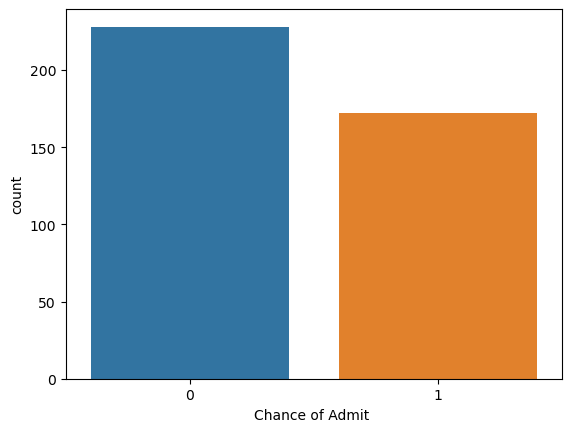

In [36]:
sns.countplot(x=y);

In [37]:
y.value_counts()

0    228
1    172
Name: Chance of Admit , dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
x,y,random_state=0,test_size=0.25)

In [39]:
x_train.shape

(300, 8)

In [40]:
x_test.shape

(100, 8)

In [41]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0
135,136,314,109,4,3.5,4.0,8.77,1
390,391,314,102,2,2.0,2.5,8.24,0
264,265,325,110,2,3.0,2.5,8.76,1


In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
classifier = DecisionTreeClassifier(random_state=0)

In [44]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [45]:
y_pred=classifier.predict(x_test)

In [47]:
result=pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred
})

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

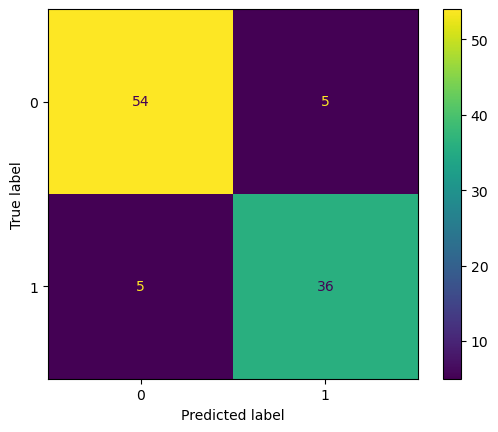

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [52]:
accuracy_score(y_test, y_pred)

0.9

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [54]:
new=[[136,314,109,4,3.5,4.0,8.77,1]]
classifier.predict(new)[0]

/Users/shreeprasadghadge/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [62]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

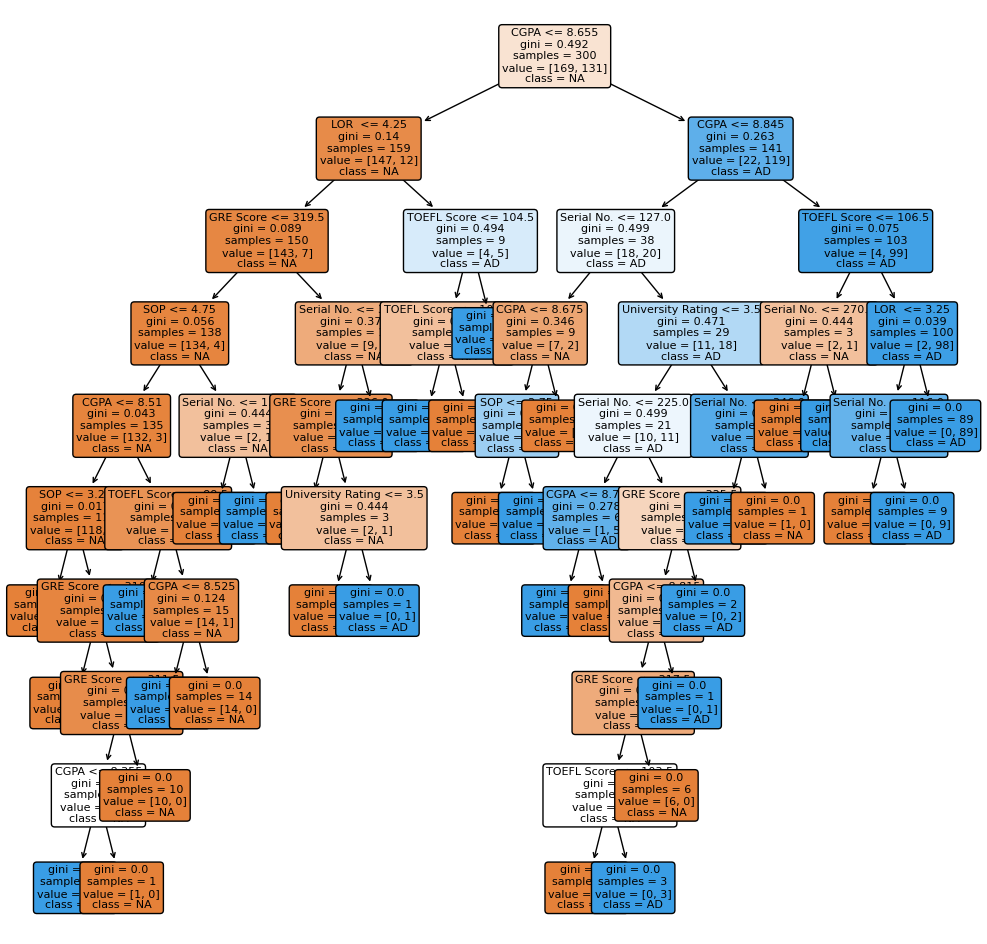

In [65]:
plt.figure(figsize=(12,12))
plot_tree(classifier,fontsize=8,filled=True,rounded=True,
         feature_names=x.columns, class_names=['NA','AD']);